In [1]:
#!pip install georasters
#!pip install geoindex
#!pip install spark
#!pip install pyspark

In [2]:
import pandas as pd
import georasters as gr
import matplotlib.pyplot as plt
from geoindex import GeoGridIndex, GeoPoint
import os
from tqdm import tqdm, tqdm_pandas

## Load Population Data

In [3]:
#Load Population Data
pop_file = 'Africa 1km Population/AFR_PPP_2015_adj_v2.tif'
pop_data = gr.from_file(pop_file)

In [4]:
#Sanity Check
africa_population = pop_data.sum()
print("Total population of Africa:", africa_population)

Total population of Africa: 1.18618e+09


/Users/alexjamar/anaconda/lib/python3.5/site-packages/matplotlib/image.py:423: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


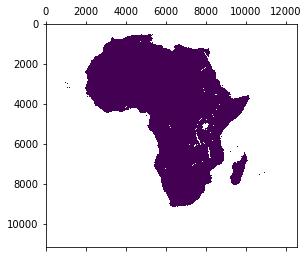

In [5]:
pop_data.plot()
plt.show()

In [6]:
#Create population DataFrame
pop_df = pop_data.to_pandas()

In [7]:
pop_df.head()

,row,col,value,x,y
0,507,5073,0.000000,8.949583,37.566250
1,508,5072,0.000000,8.941249,37.557917
2,508,5073,0.000000,8.949583,37.557917
3,509,5072,0.000000,8.941249,37.549584
4,510,5071,1.550981,8.932916,37.541250


In [8]:
#Get Stats
pop_df.describe()

,row,col,value,x,y
count,3.663813e+07,3.663813e+07,3.663813e+07,3.663813e+07,3.663813e+07
mean,4.236669e+03,6.183950e+03,2.967386e+01,1.820750e+01,6.485674e+00
std,2.097656e+03,1.862437e+03,3.628261e+02,1.552030e+01,1.748047e+01
min,5.070000e+02,9.550000e+02,0.000000e+00,-2.536708e+01,-4.036708e+01
25%,2.567000e+03,4.865000e+03,2.533315e-01,7.216249e+00,-6.650416e+00
50%,3.886000e+03,6.404000e+03,3.148337e+00,2.004125e+01,9.407917e+00
75%,5.813000e+03,7.573000e+03,1.384703e+01,2.978292e+01,2.039958e+01
max,9.859000e+03,1.161900e+04,1.345828e+05,6.349958e+01,3.756625e+01


In [9]:
#Save to csv
pop_df.to_csv("africa_pop_data.csv")

In [10]:
#Load Swaziland Pop File
swaz_pop_file = 'Swaziland 100m Population/SWZ15adjv4.tif'
swaz_pop_data = gr.from_file(swaz_pop_file)

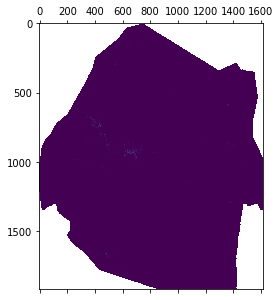

In [11]:
swaz_pop_data.plot()
plt.show()

In [12]:
#Convert to DataFrame
swaz_pop = swaz_pop_data.to_pandas()

In [13]:
swaz_pop.head()

,row,col,value,x,y
0,3,748,0.019898,31.413377,-25.718035
1,3,749,0.019898,31.414211,-25.718035
2,3,750,0.019898,31.415044,-25.718035
3,4,744,0.019898,31.410044,-25.718868
4,4,745,0.019898,31.410877,-25.718868


In [14]:
#Round Population Data to 3 decimal points & Add Country Tag
swaz_pop['value'] = swaz_pop['value'].apply(lambda x: round(x, 3))
swaz_pop['country'] = 'Swaziland'

In [15]:
swaz_pop.head()

,row,col,value,x,y,country
0,3,748,0.02,31.413377,-25.718035,Swaziland
1,3,749,0.02,31.414211,-25.718035,Swaziland
2,3,750,0.02,31.415044,-25.718035,Swaziland
3,4,744,0.02,31.410044,-25.718868,Swaziland
4,4,745,0.02,31.410877,-25.718868,Swaziland


In [16]:
#Create csv
swaz_pop.to_csv("swaz_pop_data.csv")

## Load Water Data

In [17]:
os.getcwd()

'/Users/alexjamar/Documents/Berkeley/Capstone/Capstone_Water_Access/Population'

In [18]:
water_data = pd.read_csv("/Users/alexjamar/Documents/Berkeley/Capstone/Capstone_Water_Access//data/Water_Point_Data_Exchange_Complete_Dataset.csv")

/Users/alexjamar/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,5,7,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
water_data.head()

,Row ID,#country_name,#water_source,#water_tech,#status_id,#management,#pay,#installer,#install_year,#status,...,#converted,#created,#updated,#lat_deg,#lon_deg,Location,Count,#fecal_coliform_presence,#fecal_coliform_value,#subjective_quality
0,1,"Tanzania, United Republic of",Spring,Gravity Communal standpipe,no,NaN,Never pay,RWE,1972.0,Status:Not functional|Quantity:Dry|Quality:Soft,...,"""#water_tech, #country_id, #data_lnk""",10/23/2015 01:03:07 AM +0000,10/23/2015 01:03:07 AM +0000,-2.83257,36.3090,"(-2.83257, 36.309)",1,NaN,NaN,NaN
1,2,"Tanzania, United Republic of",Rainwater harvesting,Gravity Communal standpipe,yes,NaN,Never pay,World Vision,2005.0,Status:Functional|Breakdown Year:2007|Reason N...,...,"""#water_tech, #country_id, #data_lnk""",10/23/2015 01:03:07 AM +0000,10/23/2015 01:03:07 AM +0000,-2.84781,36.5284,"(-2.84781, 36.5284)",1,NaN,NaN,NaN
2,3,"Tanzania, United Republic of",Rainwater harvesting,Gravity Communal standpipe,yes,NaN,Never pay,World Vision,2005.0,Status:Functional|Quantity:Seasonal|Quality:Soft,...,"""#water_tech, #country_id, #data_lnk""",10/23/2015 01:03:07 AM +0000,10/23/2015 01:03:07 AM +0000,-2.84796,36.5288,"(-2.84796, 36.5288)",1,NaN,NaN,NaN
3,4,"Tanzania, United Republic of",Rainwater harvesting,Gravity Communal standpipe,yes,NaN,Never pay,World Vision,2005.0,Status:Functional|Quantity:Seasonal|Quality:Soft,...,"""#water_tech, #country_id, #data_lnk""",10/23/2015 01:03:07 AM +0000,10/23/2015 01:03:07 AM +0000,-2.85318,36.5276,"(-2.85318, 36.5276)",1,NaN,NaN,NaN
4,5,Nicaragua,NaN,NaN,yes,NaN,NaN,NaN,2011.0,NaN,...,"#data_lnk, #lon_deg, #lat_deg, #country_id",04/08/2016 08:35:49 AM +0000,04/08/2016 08:35:49 AM +0000,12.74070,-86.0121,"(12.7407, -86.0121)",1,NaN,NaN,NaN


In [20]:
#Create df with only Swaziland water
swaz_water = water_data[water_data['#country_name'] == 'Swaziland']

In [21]:
swaz_water.head()

,Row ID,#country_name,#water_source,#water_tech,#status_id,#management,#pay,#installer,#install_year,#status,...,#converted,#created,#updated,#lat_deg,#lon_deg,Location,Count,#fecal_coliform_presence,#fecal_coliform_value,#subjective_quality
301736,472293,Swaziland,Borehole fitted with submersible pump,Standpipe,no,Community Management,15,NaN,1982.0,Stolen Pump,...,#status_id; #report_date; #management; #instal...,01/19/2017 06:10:50 AM +0000,01/19/2017 06:10:50 AM +0000,-27.1031,31.1317,"(-27.1031, 31.1317)",1,NaN,NaN,NaN
301737,472294,Swaziland,Borehole fitted with submersible pump,Standpipe,no,Community Management,15,NaN,1982.0,Stolen Pump,...,#status_id; #report_date; #management; #instal...,01/19/2017 06:10:50 AM +0000,01/19/2017 06:10:50 AM +0000,-27.1045,31.1286,"(-27.1045, 31.1286)",1,NaN,NaN,NaN
301738,472295,Swaziland,Borehole fitted with submersible pump,Standpipe,no,Community Management,15,NaN,1982.0,Stolen Pump,...,#status_id; #report_date; #management; #instal...,01/19/2017 06:10:50 AM +0000,01/19/2017 06:10:50 AM +0000,-27.1051,31.1281,"(-27.1051, 31.1281)",1,NaN,NaN,NaN
301739,472296,Swaziland,Borehole fitted with submersible pump,Standpipe,no,Community Management,15,NaN,1982.0,Stolen Pump,...,#status_id; #report_date; #management; #instal...,01/19/2017 06:10:50 AM +0000,01/19/2017 06:10:50 AM +0000,-27.1068,31.1275,"(-27.1068, 31.1275)",1,NaN,NaN,NaN
301740,472297,Swaziland,Borehole fitted with submersible pump,Standpipe,no,Community Management,15,NaN,1982.0,Stolen Pump,...,#status_id; #report_date; #management; #instal...,01/19/2017 06:10:50 AM +0000,01/19/2017 06:10:50 AM +0000,-27.1096,31.1319,"(-27.1096, 31.1319)",1,NaN,NaN,NaN


## Radius-based Search

In [22]:
#Create Geo Index of Swaziland Population Data
geo_index = GeoGridIndex()
for index, row in swaz_pop.iterrows():
    geo_index.add_point(GeoPoint(row['y'], row['x'], ref=row['value']))

In [23]:
#Calculate population with x distance of random well
def calculate_population_within_x_km(row, index, km):
    center_point = GeoPoint(row['#lat_deg'], row['#lon_deg'])
    total_population = 0
    try:
        for point,distance in index.get_nearest_points(center_point, km, 'km'):
            total_population += point.ref
    except:
        print("Invalid data - Record skipped")
    #print("Total population within", km, "kilometers:", int(total_population))
    return total_population

In [24]:
#Add 1,5,10 km radii population data to each well
tqdm.pandas()
swaz_water['1 km population'] = swaz_water.progress_apply(lambda row: calculate_population_within_x_km(row, geo_index, 1),
                                                  axis = 1)

 95%|█████████▌| 22665/23784 [21:41:29<50:46,  2.72s/it]   

Invalid data - Record skipped


100%|██████████| 23784/23784 [22:35:24<00:00,  3.42s/it]  
/Users/alexjamar/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
swaz_water.to_csv("Swaziland_Water_Sources_and_Population.csv", index = False)